<a href="https://colab.research.google.com/github/elizamelo/FisicaGeral/blob/main/50MedidasdeTempodeQueda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy import stats


In [202]:
#Valor nominal ou do fabricante
#R_ref= 39.0 #(10kΩ) ou 

In [203]:
##Exemplo: Medidas dos 50 tempo e dos grupos de 10 (s)

array_GR01 = [1.25,1.22,1.23,1.25,1.24,1.22,1.24,1.19,1.22,1.20] #(s)
array_GR02 = [1.20,1.19,1.23,1.24,1.20,1.23,1.22,1.21,1.21,1.22] #(s)
array_GR03 = [1.21,1.22,1.23,1.20,1.22,1.23,1.24,1.25,1.26,1.23] #(s)
array_GR04 = [1.23,1.23,1.22,1.24,1.22,1.24,1.23,1.23,1.23,1.22] #(s)
array_GR05 = [1.24,1.22,1.22,1.23,1.21,1.20,1.20,1.22,1.22,1.22] #(s)
array_50 = (array_GR01)+(array_GR02)+(array_GR03)+(array_GR04)+(array_GR05)#(10k ohms)


In [204]:
def compatibilidade(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-np.mean(array_100))/ec
  if d<=2.0:
    print("Compatível", d, ec, abs(np.mean(grupo)-np.mean(array_100)))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,ec, abs(np.mean(grupo)-np.mean(array_100)))
  else:
    print("Incompatível", d,ec,abs(np.mean(grupo)-np.mean(array_100)))
  return(d)

In [205]:
def compatibilidadeRef(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  #egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  #ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-R_ref)/e100
  if d<=2.0:
    print("Compatível", d, e100, abs(np.mean(grupo)-R_ref))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,e100, abs(np.mean(grupo)-R_ref))
  else:
    print("Incompatível", d,e100,abs(np.mean(grupo)-R_ref))
  return(d)

In [206]:
#Funções (Ref. Manoel Miguel)

def media(grupo):
  print (f"Média {np.mean(grupo)}","(s)")

def desvioPadraoAmostral(grupo):
  print (f"Desvio Padrão (AMOSTRAL) {np.std(grupo, ddof=1)}","(s)")


def plotaGrafrico(grupo):
    fig = plt.figure( figsize=(8,6) )
    counts, bins, _ = plt.hist(grupo, bins=10, range=[np.min(grupo),np.max(grupo)])
    plt.xlabel('Tempo (s)',fontsize=18)
    plt.ylabel('Frequência',fontsize=18)
    plt.title('Histograma',fontsize=12 )
    plt.show()
    
def erroDaMedia1(grupo):
  sigma_mx = np.std(grupo, ddof=1)/np.sqrt(len(grupo))
  return(sigma_mx)

def erroDaMedia2(grupo):
  print(f"sigma_mx = {np.std(grupo, ddof=1)/np.sqrt(len(grupo))}","(s)")


def EstimativaPadrao(grupo): 
  print(f"x = {np.mean(grupo)} ± {erroDaMedia1(grupo):.3f} (s)")

def erroRelativo(grupo):
  erroRelativo = (erroDaMedia1(grupo)/abs(np.mean(grupo)))
  print(f"{erroRelativo*100}%")

def desvioPadraoExp(grupo):
  sx = 0
  for elemento in grupo:
      sx += ((elemento - np.median(grupo))**2)/(len(grupo)-1)
  sx = np.sqrt(sx)
  return (sx)

def desvioPadrao(grupo):
  ox = 0
  for elemento in grupo:
      ox += ((elemento - np.average(grupo))**2)/(len(grupo))
  ox = np.sqrt(ox)
  return (ox)




#Para o conjunto completo de 50 medidas e para para cada conjunto de 10 medidas:


*   Média
*   Desvio padrão 
*   estimativa padrao
*   erro relativo
*   Histogramas


## Médias:

In [207]:
media(array_50)
media(array_GR01)
media(array_GR02)
media(array_GR03)
media(array_GR04)
media(array_GR05)


Média 1.2234 (s)
Média 1.226 (s)
Média 1.215 (s)
Média 1.229 (s)
Média 1.229 (s)
Média 1.2180000000000002 (s)


## Desvios Padrão:

In [208]:
desvioPadraoAmostral(array_50)
desvioPadraoAmostral(array_GR01)
desvioPadraoAmostral(array_GR02)
desvioPadraoAmostral(array_GR03)
desvioPadraoAmostral(array_GR04)
desvioPadraoAmostral(array_GR05)

Desvio Padrão (AMOSTRAL) 0.015857786344729913 (s)
Desvio Padrão (AMOSTRAL) 0.020110804171997825 (s)
Desvio Padrão (AMOSTRAL) 0.01581138830084191 (s)
Desvio Padrão (AMOSTRAL) 0.01791957340762083 (s)
Desvio Padrão (AMOSTRAL) 0.007378647873726225 (s)
Desvio Padrão (AMOSTRAL) 0.012292725943057192 (s)


In [209]:


desvioPadraoExp(array_GR05)


0.012472191289246483

## Erro da Média:

In [210]:
erroDaMedia2(array_50)
erroDaMedia2(array_GR01)
erroDaMedia2(array_GR02)
erroDaMedia2(array_GR03)
erroDaMedia2(array_GR04)
erroDaMedia2(array_GR05)

sigma_mx = 0.0022426296517931914 (s)
sigma_mx = 0.006359594676112976 (s)
sigma_mx = 0.005000000000000004 (s)
sigma_mx = 0.0056666666666666705 (s)
sigma_mx = 0.0023333333333333353 (s)
sigma_mx = 0.003887301263230203 (s)


## Estimativa Padrão:

In [211]:
EstimativaPadrao(array_50)
EstimativaPadrao(array_GR01)
EstimativaPadrao(array_GR02)
EstimativaPadrao(array_GR03)
EstimativaPadrao(array_GR04)
EstimativaPadrao(array_GR05)


x = 1.2234 ± 0.002 (s)
x = 1.226 ± 0.006 (s)
x = 1.215 ± 0.005 (s)
x = 1.229 ± 0.006 (s)
x = 1.229 ± 0.002 (s)
x = 1.2180000000000002 ± 0.004 (s)


##Erro Relativo:

In [212]:
erroRelativo(array_50)
erroRelativo(array_GR01)
erroRelativo(array_GR02)
erroRelativo(array_GR03)
erroRelativo(array_GR04)
erroRelativo(array_GR05)

0.18331123522913123%
0.5187271350826245%
0.41152263374485626%
0.46107946840249553%
0.18985625169514525%
0.319154455109212%


## Histogramas:

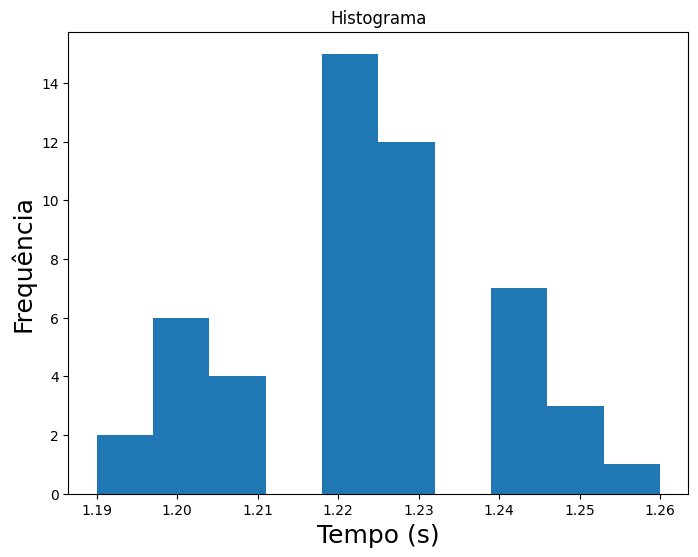

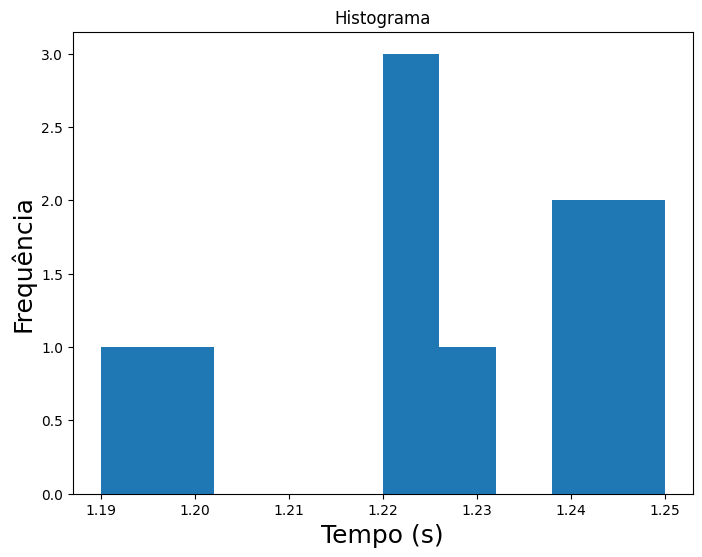

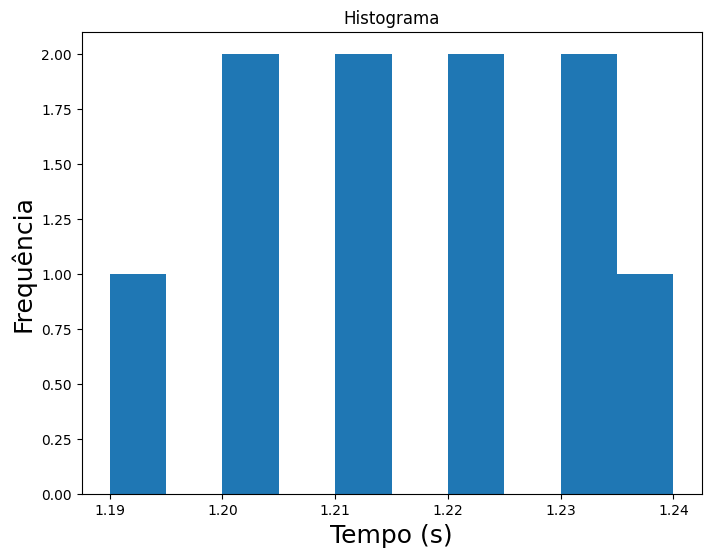

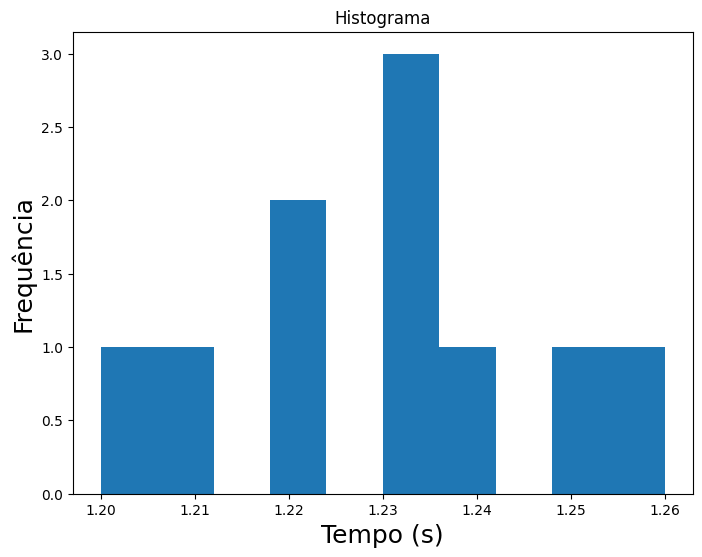

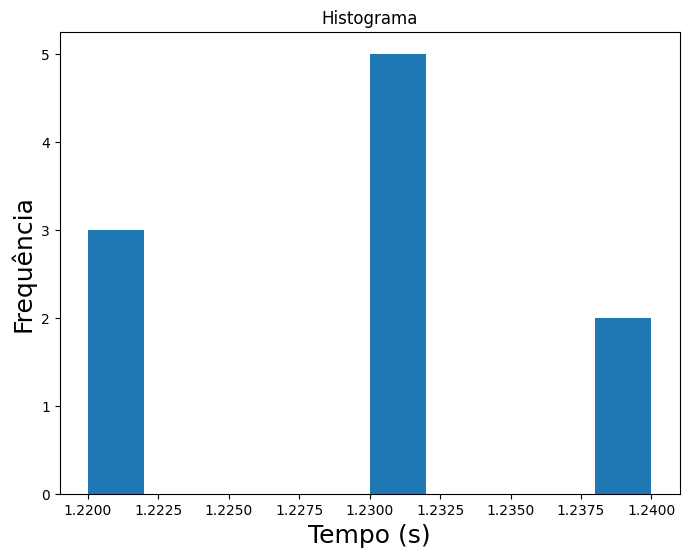

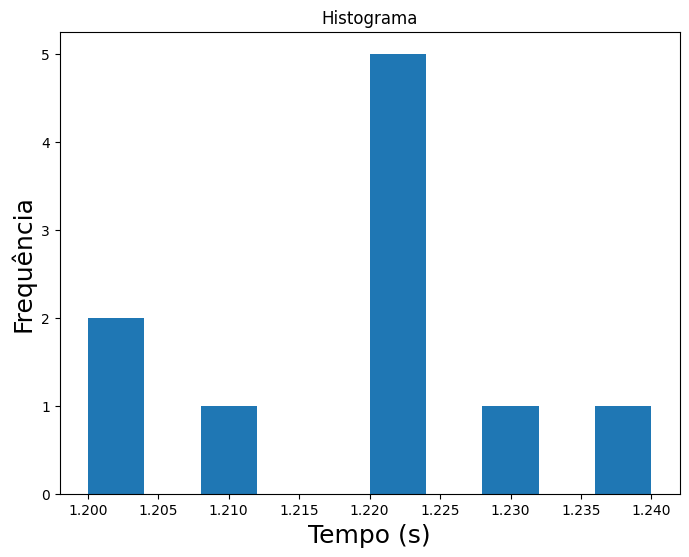

In [213]:
plotaGrafrico(array_50)
plotaGrafrico(array_GR01)
plotaGrafrico(array_GR02)
plotaGrafrico(array_GR03)
plotaGrafrico(array_GR04)
plotaGrafrico(array_GR05)

#Conjunto completo de valores de tempo (50):

In [214]:

amplitude_50=(np.max(array_50)-np.min(array_50))
print ( "Valor mínimo: {}".format( np.min(array_50) ),"(s)" )
print ( "Valor máximo: {}".format( np.max(array_50) ) ,"(s)")
print ( "Amplitude: {}".format( amplitude_50 ) ,"(s)")

Valor mínimo: 1.19 (s)
Valor máximo: 1.26 (s)
Amplitude: 0.07000000000000006 (s)


In [215]:
#Calculo da média
N50=len(array_50)
media_50=(np.sum(array_50)/N50)
vmin = np.min(array_50)
vmax = np.max(array_50)
print("média do conjunto de 50 tempos: {}".format( (media_50)),"(s)")

média do conjunto de 50 tempos: 1.2234 (s)


In [216]:
#Usando o NumPy
np.mean( array_50 )

1.2234

In [217]:
print("média do conjunto de 50 temposs: {}".format(np.mean( array_50 )),"(s)")



média do conjunto de 50 temposs: 1.2234 (s)


Variância e desvio Padrão usando o NumPY:

In [218]:
var_50 = np.var( array_50, ddof=1 )
print ( "Variância do conj. de 50: {}".format(var_50),"(s^2)" )
print ( "Desvio Padrao do conj. de 50: {}".format(np.sqrt(var_50)),"(s)" )
sigma_m50 = np.std( array_50, ddof=1 )/np.sqrt(N50)
print ( "Erro da média do conj. de 50: {}".format(np.std( array_50, ddof=1 )/np.sqrt(N50)),"(s)" )

Variância do conj. de 50: 0.0002514693877551025 (s^2)
Desvio Padrao do conj. de 50: 0.015857786344729913 (s)
Erro da média do conj. de 50: 0.0022426296517931914 (s)


Estimativa Padrão dos 50 tempos:

In [219]:
print ( "T50 = {:.3f} ± {:.3f} (s)".format( np.round( np.mean( array_50 ), 3 ), np.round( sigma_m50, 3 ) ) )


T50 = 1.223 ± 0.002 (s)


#Desvio Padrão do conjunto com 50 tempos:


In [220]:
sigma_L_p = np.std( array_50, ddof=0 )
print ( "Desvio padrão populacional (s) = {}".format(sigma_L_p  ) )

sigma_L_a = np.std( array_50, ddof=1 )
print ( "Desvio padrão amostral (s) = {}".format(sigma_L_a  ) )



Desvio padrão populacional (s) = 0.01569840756255234
Desvio padrão amostral (s) = 0.015857786344729913
